In [1]:
import numpy as np
import pandas as pd
import os
import random
import copy
import matplotlib.pyplot as plt
import pandas

In [7]:
os.chdir(r"C:\Users\Shivani\sha")
list = os.listdir()
number_files = len(list)
print(number_files)

2


In [8]:
filenames = random.sample([x for x in os.listdir() if x.endswith('.csv') 
                           and os.path.getsize(os.path.join('',x)) > 0], 2)
print(filenames)

['HDFCBANK.NS.csv', 'SBIN.NS.csv']


In [9]:
pwd

'C:\\Users\\Shivani\\sha'

In [10]:
data = []
for filename in filenames:
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    data.append(df)

In [11]:
data[0].head()


,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2017-02-01,604.724976,605.049988,596.025024,598.549988,578.261780,1854328,HDFCBANK
1,2017-03-01,600.400024,600.974976,592.875000,594.950012,574.783875,1923750,HDFCBANK
2,2017-04-01,594.924988,596.000000,591.900024,592.750000,572.658447,3483560,HDFCBANK
3,2017-05-01,594.500000,597.250000,591.549988,593.099976,572.996582,3388192,HDFCBANK
4,2017-06-01,595.049988,599.200012,594.099976,596.825012,576.595337,2762630,HDFCBANK


In [12]:
data[0].tail()


,Date,Open,High,Low,Close,Adj Close,Volume,Label
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK


In [13]:
print(len(data))


2


In [14]:
TechIndicator = copy.deepcopy(data)


In [15]:
# Relative Strength Index
def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [16]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum_1D'] = (TechIndicator[stock]['Close']-TechIndicator[stock]['Close'].shift(1)).fillna(0)
    TechIndicator[stock]['RSI_14D'] = TechIndicator[stock]['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)
TechIndicator[0].tail(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK,9.000000,53.943459
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK,10.300049,56.034335
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK,2.299927,53.489523
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK,-5.500000,53.782012
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK,-7.099976,58.717438


In [17]:
#Calculation of Volume (Plain)
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Volume_plain'] = TechIndicator[stock]['Volume'].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,Volume_plain
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK,9.000000,53.943459,5616903
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK,10.300049,56.034335,10003114
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK,2.299927,53.489523,5095107
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK,-5.500000,53.782012,6553747
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK,-7.099976,58.717438,6496771


In [18]:
#Calculation of Bollinger Bands
def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    #ave = pd.stats.moments.rolling_mean(price,length)
    ave = price.rolling(window = length, center = False).mean()
    #sd = pd.stats.moments.rolling_std(price,length)
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [19]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=20, numsd=1)
    TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band'].fillna(0)
    TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band'].fillna(0)
    TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band'].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK,9.000000,53.943459,5616903,1216.978,1251.415,1182.540
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK,10.300049,56.034335,10003114,1223.890,1245.210,1202.570
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK,2.299927,53.489523,5095107,1225.990,1246.855,1205.125
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK,-5.500000,53.782012,6553747,1224.933,1244.633,1205.232
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK,-7.099976,58.717438,6496771,1223.693,1242.227,1205.158


In [20]:
#Calculation of Price Volume Trend
for stock in range(len(TechIndicator)):
    TechIndicator[stock]["PVT"] = (TechIndicator[stock]['Momentum_1D']/ TechIndicator[stock]['Close'].shift(1))*TechIndicator[stock]['Volume']
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"]-TechIndicator[stock]["PVT"].shift(1)
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,PVT
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK,9.000000,53.943459,5616903,1216.978,1251.415,1182.540,46950.739248
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK,10.300049,56.034335,10003114,1223.890,1245.210,1202.570,42398.300916
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK,2.299927,53.489523,5095107,1225.990,1246.855,1205.125,-74378.831361
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK,-5.500000,53.782012,6553747,1224.933,1244.633,1205.232,-38487.218799
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK,-7.099976,58.717438,6496771,1223.693,1242.227,1205.158,-8284.915107


In [21]:
#Calculation of Acceleration Bands
def abands(df):
    #df['AB_Middle_Band'] = pd.rolling_mean(df['Close'], 20)
    df['AB_Middle_Band'] = df['Close'].rolling(window = 20, center=False).mean()
    # High * ( 1 + 4 * (High - Low) / (High + Low))
    df['aupband'] = df['High'] * (1 + 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    # Low *(1 - 4 * (High - Low)/ (High + Low))
    df['adownband'] = df['Low'] * (1 - 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [22]:
for stock in range(len(TechIndicator)):
    abands(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,PVT,AB_Middle_Band,aupband,AB_Upper_Band,adownband,AB_Lower_Band
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK,9.000000,53.943459,5616903,1216.978,1251.415,1182.540,46950.739248,1216.977509,1260.998497,1301.076756,1193.498497,1134.239232
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK,10.300049,56.034335,10003114,1223.890,1245.210,1202.570,42398.300916,1223.890009,1306.278327,1308.708916,1184.278207,1141.533899
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK,2.299927,53.489523,5095107,1225.990,1246.855,1205.125,-74378.831361,1225.990009,1283.476009,1301.466059,1199.726009,1156.228542
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK,-5.500000,53.782012,6553747,1224.933,1244.633,1205.232,-38487.218799,1224.932507,1310.373255,1297.364919,1171.373015,1158.602378
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK,-7.099976,58.717438,6496771,1223.693,1242.227,1205.158,-8284.915107,1223.692505,1301.134415,1295.836619,1166.884535,1158.961558


In [23]:
#Calculation of Stochastic Oscillator (%K and %D)
def STOK(df, n):
    df['STOK'] = ((df['Close'] - df['Low'].rolling(window=n, center=False).mean()) / (df['High'].rolling(window=n, center=False).max() - df['Low'].rolling(window=n, center=False).min())) * 100
    df['STOD'] = df['STOK'].rolling(window = 3, center=False).mean()

In [24]:
for stock in range(len(TechIndicator)):
    STOK(TechIndicator[stock], 4)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,...,BB_Upper_Band,BB_Lower_Band,PVT,AB_Middle_Band,aupband,AB_Upper_Band,adownband,AB_Lower_Band,STOK,STOD
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK,9.000000,53.943459,...,1251.415,1182.540,46950.739248,1216.977509,1260.998497,1301.076756,1193.498497,1134.239232,58.259361,45.742582
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK,10.300049,56.034335,...,1245.210,1202.570,42398.300916,1223.890009,1306.278327,1308.708916,1184.278207,1141.533899,43.203758,45.467778
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK,2.299927,53.489523,...,1246.855,1205.125,-74378.831361,1225.990009,1283.476009,1301.466059,1199.726009,1156.228542,38.354179,46.605766
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK,-5.500000,53.782012,...,1244.633,1205.232,-38487.218799,1224.932507,1310.373255,1297.364919,1171.373015,1158.602378,21.896286,34.484741
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK,-7.099976,58.717438,...,1242.227,1205.158,-8284.915107,1223.692505,1301.134415,1295.836619,1166.884535,1158.961558,2.736519,20.995661


In [25]:
#Calculation of Chaikin Money Flow
def CMFlow(df, tf):
    CHMF = []
    MFMs = []
    MFVs = []
    x = tf
    
    while x < len(df['Date']):
        PeriodVolume = 0
        volRange = df['Volume'][x-tf:x]
        for eachVol in volRange:
            PeriodVolume += eachVol
        
        MFM = ((df['Close'][x] - df['Low'][x]) - (df['High'][x] - df['Close'][x])) / (df['High'][x] - df['Low'][x])
        MFV = MFM*PeriodVolume
        
        MFMs.append(MFM)
        MFVs.append(MFV)
        x+=1
    
    y = tf
    while y < len(MFVs):
        PeriodVolume = 0
        volRange = df['Volume'][x-tf:x]
        for eachVol in volRange:
            PeriodVolume += eachVol
        consider = MFVs[y-tf:y]
        tfsMFV = 0
        
        for eachMFV in consider:
            tfsMFV += eachMFV
        
        tfsCMF = tfsMFV/PeriodVolume
        CHMF.append(tfsCMF)
        y+=1
    return CHMF

In [26]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 40
    CHMF = CMFlow(TechIndicator[stock], 20)
    if len(CHMF)==0:
        CHMF = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Chaikin_MF'] = CHMF
    else:
        TechIndicator[stock]['Chaikin_MF'] = listofzeros+CHMF
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,...,BB_Lower_Band,PVT,AB_Middle_Band,aupband,AB_Upper_Band,adownband,AB_Lower_Band,STOK,STOD,Chaikin_MF
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK,9.000000,53.943459,...,1182.540,46950.739248,1216.977509,1260.998497,1301.076756,1193.498497,1134.239232,58.259361,45.742582,-1.716643
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK,10.300049,56.034335,...,1202.570,42398.300916,1223.890009,1306.278327,1308.708916,1184.278207,1141.533899,43.203758,45.467778,-0.763118
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK,2.299927,53.489523,...,1205.125,-74378.831361,1225.990009,1283.476009,1301.466059,1199.726009,1156.228542,38.354179,46.605766,-1.767579
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK,-5.500000,53.782012,...,1205.232,-38487.218799,1224.932507,1310.373255,1297.364919,1171.373015,1158.602378,21.896286,34.484741,-2.503502
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK,-7.099976,58.717438,...,1205.158,-8284.915107,1223.692505,1301.134415,1295.836619,1166.884535,1158.961558,2.736519,20.995661,-2.895419


In [27]:
#Calculation of Momentum
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum'] = TechIndicator[stock]['Close'] - TechIndicator[stock]['Close'].shift(4)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,...,PVT,AB_Middle_Band,aupband,AB_Upper_Band,adownband,AB_Lower_Band,STOK,STOD,Chaikin_MF,Momentum
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK,9.000000,53.943459,...,46950.739248,1216.977509,1260.998497,1301.076756,1193.498497,1134.239232,58.259361,45.742582,-1.716643,24.599976
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK,10.300049,56.034335,...,42398.300916,1223.890009,1306.278327,1308.708916,1184.278207,1141.533899,43.203758,45.467778,-0.763118,16.250000
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK,2.299927,53.489523,...,-74378.831361,1225.990009,1283.476009,1301.466059,1199.726009,1156.228542,38.354179,46.605766,-1.767579,20.500000
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK,-5.500000,53.782012,...,-38487.218799,1224.932507,1310.373255,1297.364919,1171.373015,1158.602378,21.896286,34.484741,-2.503502,16.099976
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK,-7.099976,58.717438,...,-8284.915107,1223.692505,1301.134415,1295.836619,1166.884535,1158.961558,2.736519,20.995661,-2.895419,0.000000


In [28]:
#Calculation of MACD
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['26_ema'] = TechIndicator[stock]['Close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
    TechIndicator[stock]['12_ema'] = TechIndicator[stock]['Close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
    TechIndicator[stock]['MACD'] = TechIndicator[stock]['12_ema'] - TechIndicator[stock]['26_ema']
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,...,AB_Upper_Band,adownband,AB_Lower_Band,STOK,STOD,Chaikin_MF,Momentum,26_ema,12_ema,MACD
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK,9.000000,53.943459,...,1301.076756,1193.498497,1134.239232,58.259361,45.742582,-1.716643,24.599976,1196.701247,1214.116829,17.415582
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK,10.300049,56.034335,...,1308.708916,1184.278207,1141.533899,43.203758,45.467778,-0.763118,16.250000,1199.856714,1217.991171,18.134457
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK,2.299927,53.489523,...,1301.466059,1199.726009,1156.228542,38.354179,46.605766,-1.767579,20.500000,1202.948807,1221.623295,18.674487
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK,-5.500000,53.782012,...,1297.364919,1171.373015,1158.602378,21.896286,34.484741,-2.503502,16.099976,1205.404449,1223.850476,18.446027
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK,-7.099976,58.717438,...,1295.836619,1166.884535,1158.961558,2.736519,20.995661,-2.895419,0.000000,1207.152268,1224.642711,17.490443


In [29]:
#Calculation of MINMAX
def MINMAX(df):
    df['MIN_Volume'] = df['Volume'].rolling(window=14,center=False).min()
    df['MAX_Volume'] = df['Volume'].rolling(window=14,center=False).max()
for stock in range(len(TechIndicator)):
    MINMAX(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,...,AB_Lower_Band,STOK,STOD,Chaikin_MF,Momentum,26_ema,12_ema,MACD,MIN_Volume,MAX_Volume
687,2019-10-18,1225.449951,1233.849976,1220.349976,1229.000000,1229.000000,5616903,HDFCBANK,9.000000,53.943459,...,1134.239232,58.259361,45.742582,-1.716643,24.599976,1196.701247,1214.116829,17.415582,4200187.0,11256610.0
688,2019-10-22,1257.000000,1257.000000,1232.599976,1239.300049,1239.300049,10003114,HDFCBANK,10.300049,56.034335,...,1141.533899,43.203758,45.467778,-0.763118,16.250000,1199.856714,1217.991171,18.134457,4200187.0,11256610.0
689,2019-10-23,1246.849976,1249.750000,1233.000000,1241.599976,1241.599976,5095107,HDFCBANK,2.299927,53.489523,...,1156.228542,38.354179,46.605766,-1.767579,20.500000,1202.948807,1221.623295,18.674487,4200187.0,11256610.0
690,2019-10-24,1248.000000,1254.150024,1226.349976,1236.099976,1236.099976,6553747,HDFCBANK,-5.500000,53.782012,...,1158.602378,21.896286,34.484741,-2.503502,16.099976,1205.404449,1223.850476,18.446027,4200187.0,11256610.0
691,2019-10-25,1240.000000,1246.849976,1220.000000,1229.000000,1229.000000,6496771,HDFCBANK,-7.099976,58.717438,...,1158.961558,2.736519,20.995661,-2.895419,0.000000,1207.152268,1224.642711,17.490443,4200187.0,11256610.0


In [30]:
TechIndicator[0].head()


,Date,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,...,AB_Lower_Band,STOK,STOD,Chaikin_MF,Momentum,26_ema,12_ema,MACD,MIN_Volume,MAX_Volume
0,2017-02-01,604.724976,605.049988,596.025024,598.549988,578.261780,1854328,HDFCBANK,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,598.549988,598.549988,0.000000,0.0,0.0
1,2017-03-01,600.400024,600.974976,592.875000,594.950012,574.783875,1923750,HDFCBANK,-3.599976,0.0,...,0.0,0.000000,0.0,0.0,0.000000,596.680770,596.600001,-0.080769,0.0,0.0
2,2017-04-01,594.924988,596.000000,591.900024,592.750000,572.658447,3483560,HDFCBANK,-2.200012,0.0,...,0.0,0.000000,0.0,0.0,0.000000,595.268482,595.097345,-0.171138,0.0,0.0
3,2017-05-01,594.500000,597.250000,591.549988,593.099976,572.996582,3388192,HDFCBANK,0.349976,0.0,...,0.0,0.092348,0.0,0.0,0.000000,594.662263,594.466853,-0.195409,0.0,0.0
4,2017-06-01,595.049988,599.200012,594.099976,596.825012,576.595337,2762630,HDFCBANK,3.725036,0.0,...,0.0,44.761489,0.0,0.0,-1.724976,595.163813,595.107557,-0.056256,0.0,0.0


In [31]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock].index = TechIndicator[stock]['Date']
    TechIndicator[stock] = TechIndicator[stock].drop(labels = ['Date'], axis = 1)
TechIndicator[0].head()

,Open,High,Low,Close,Adj Close,Volume,Label,Momentum_1D,RSI_14D,Volume_plain,...,AB_Lower_Band,STOK,STOD,Chaikin_MF,Momentum,26_ema,12_ema,MACD,MIN_Volume,MAX_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,604.724976,605.049988,596.025024,598.549988,578.261780,1854328,HDFCBANK,0.000000,0.0,1854328,...,0.0,0.000000,0.0,0.0,0.000000,598.549988,598.549988,0.000000,0.0,0.0
2017-03-01,600.400024,600.974976,592.875000,594.950012,574.783875,1923750,HDFCBANK,-3.599976,0.0,1923750,...,0.0,0.000000,0.0,0.0,0.000000,596.680770,596.600001,-0.080769,0.0,0.0
2017-04-01,594.924988,596.000000,591.900024,592.750000,572.658447,3483560,HDFCBANK,-2.200012,0.0,3483560,...,0.0,0.000000,0.0,0.0,0.000000,595.268482,595.097345,-0.171138,0.0,0.0
2017-05-01,594.500000,597.250000,591.549988,593.099976,572.996582,3388192,HDFCBANK,0.349976,0.0,3388192,...,0.0,0.092348,0.0,0.0,0.000000,594.662263,594.466853,-0.195409,0.0,0.0
2017-06-01,595.049988,599.200012,594.099976,596.825012,576.595337,2762630,HDFCBANK,3.725036,0.0,2762630,...,0.0,44.761489,0.0,0.0,-1.724976,595.163813,595.107557,-0.056256,0.0,0.0


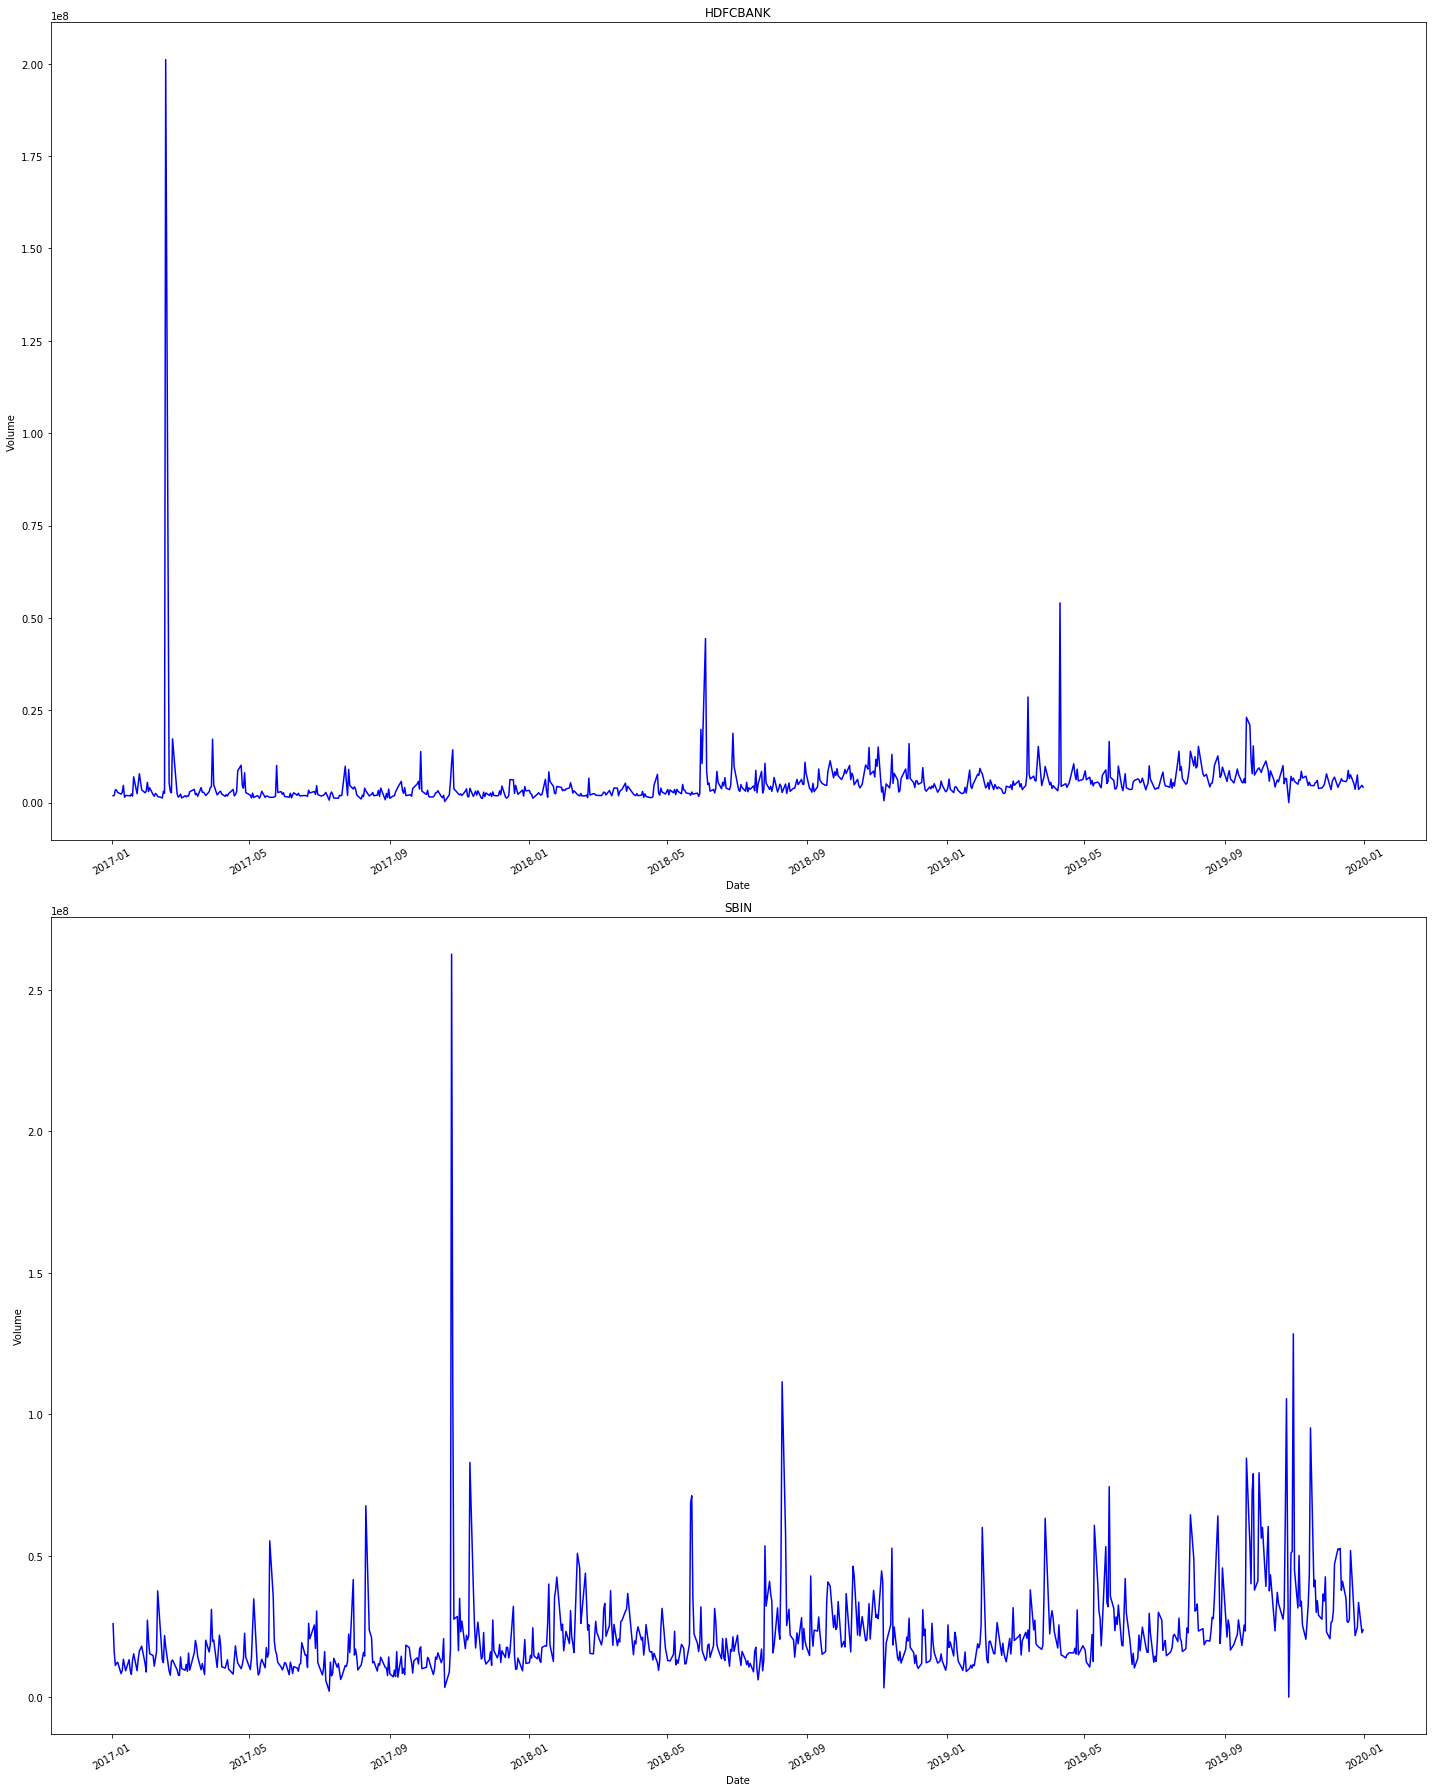

In [28]:
# Volume Plain plot
fig = plt.figure(figsize=(20,25))
for i in range(2):
    ax = plt.subplot(2,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Volume_plain'], 'b')
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    plt.xticks(rotation=30)
fig.tight_layout()

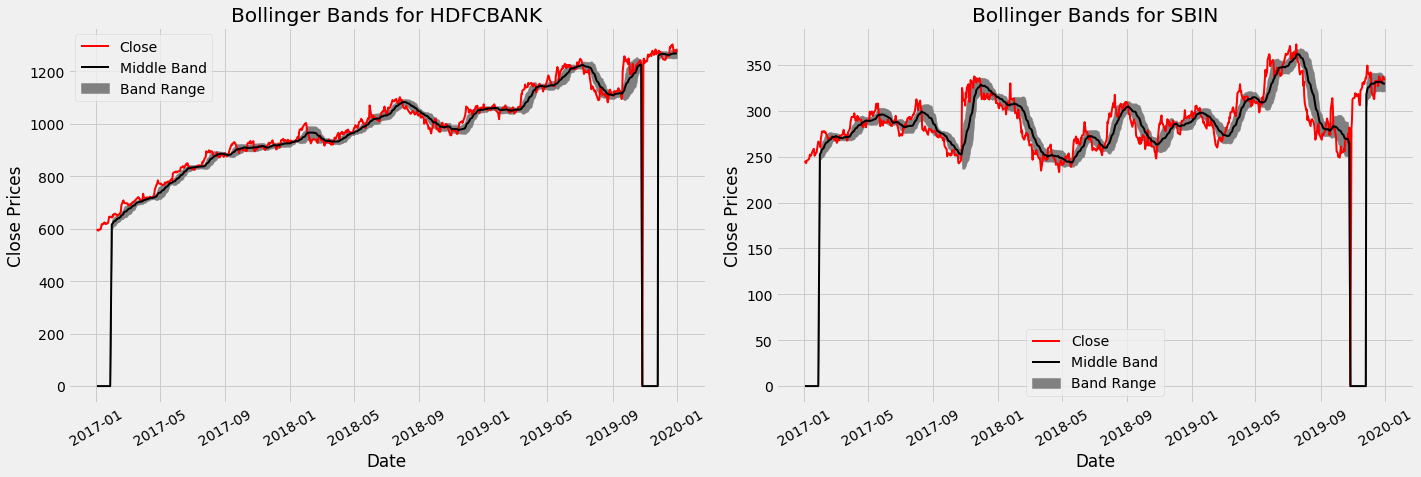

In [29]:
#Bollinger bands
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,25))
for i in range(2):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['BB_Upper_Band'], TechIndicator[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()
#.dt.to_pydatetime()

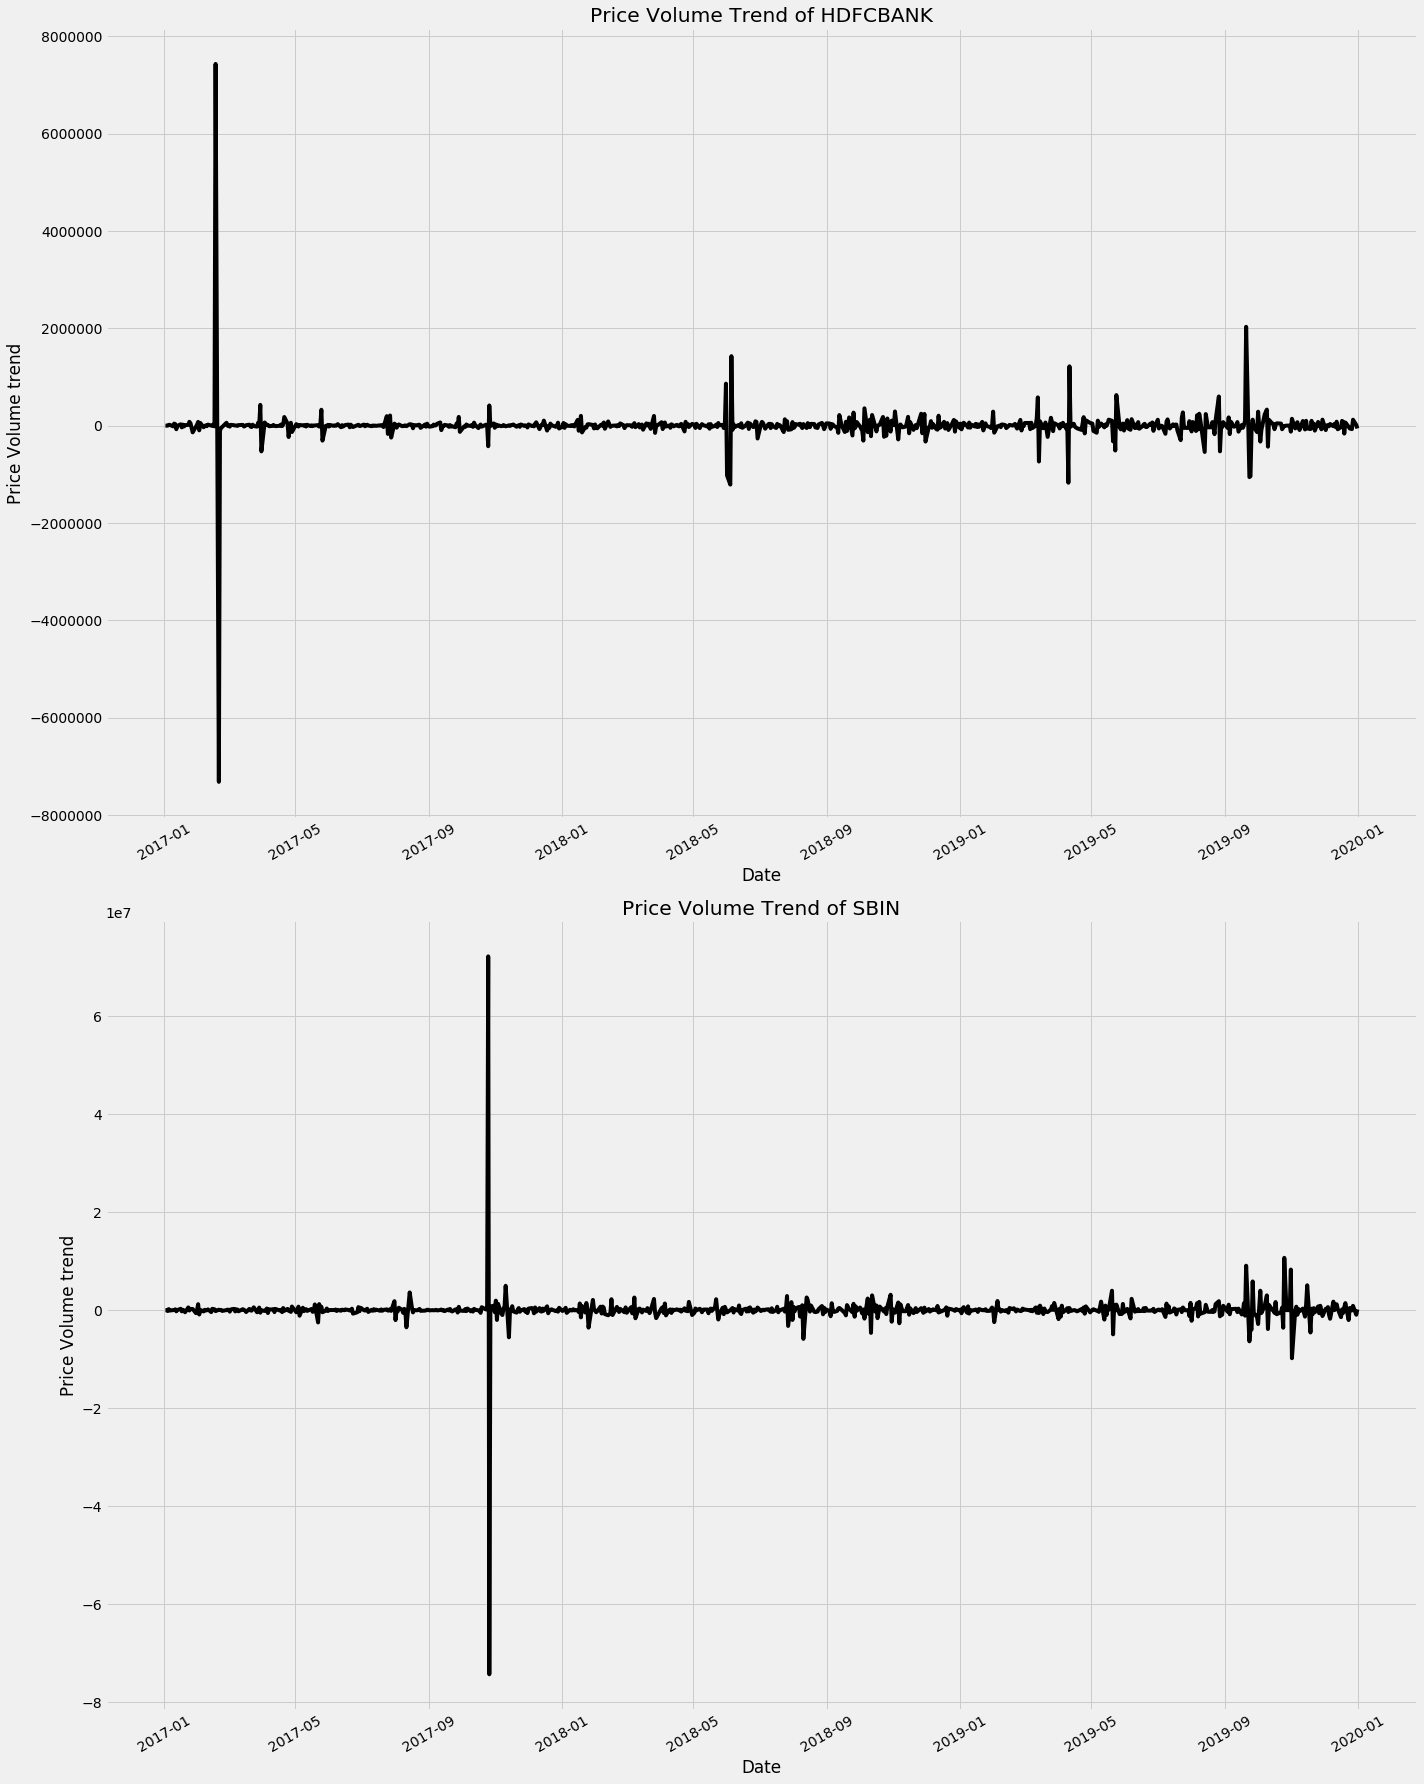

In [30]:
#Price Volume Trend
fig = plt.figure(figsize=(20,25))
for i in range(2):
    ax = plt.subplot(2,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['PVT'], 'black')
    ax.set_title("Price Volume Trend of " +str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price Volume trend")
    plt.xticks(rotation=30)
fig.tight_layout()

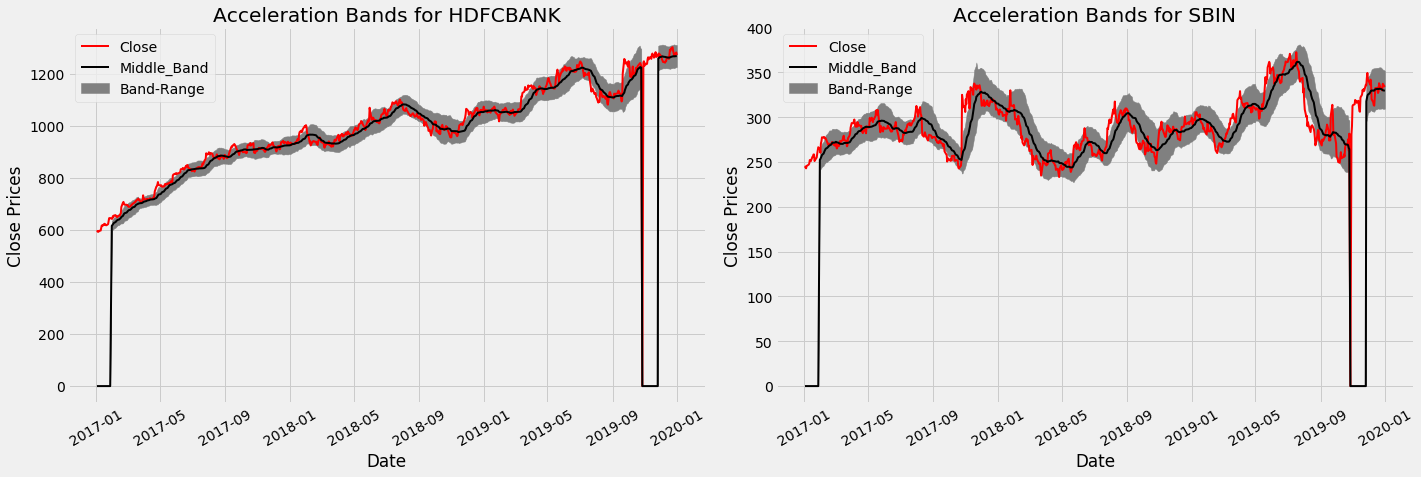

In [31]:
# Acceleration band Plot

fig = plt.figure(figsize=(20,25))
for i in range(2):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['AB_Upper_Band'], TechIndicator[i]['AB_Lower_Band'], color='grey', label = "Band-Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label = "Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['AB_Middle_Band'], color='black', lw=2, label="Middle_Band")
    ax.set_title("Acceleration Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

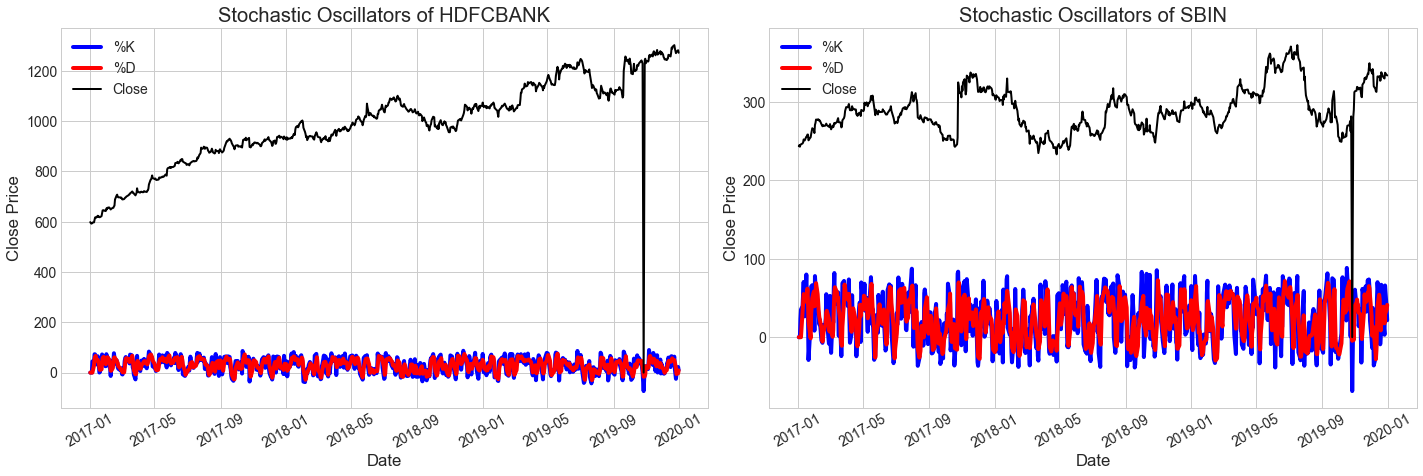

In [32]:
# Stochastic Oscillator plots
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(2):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['STOK'], 'blue', label="%K")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['STOD'], 'red', label="%D")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='black', lw=2, label = "Close")
    ax.set_title("Stochastic Oscillators of " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.xticks(rotation=30)
fig.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


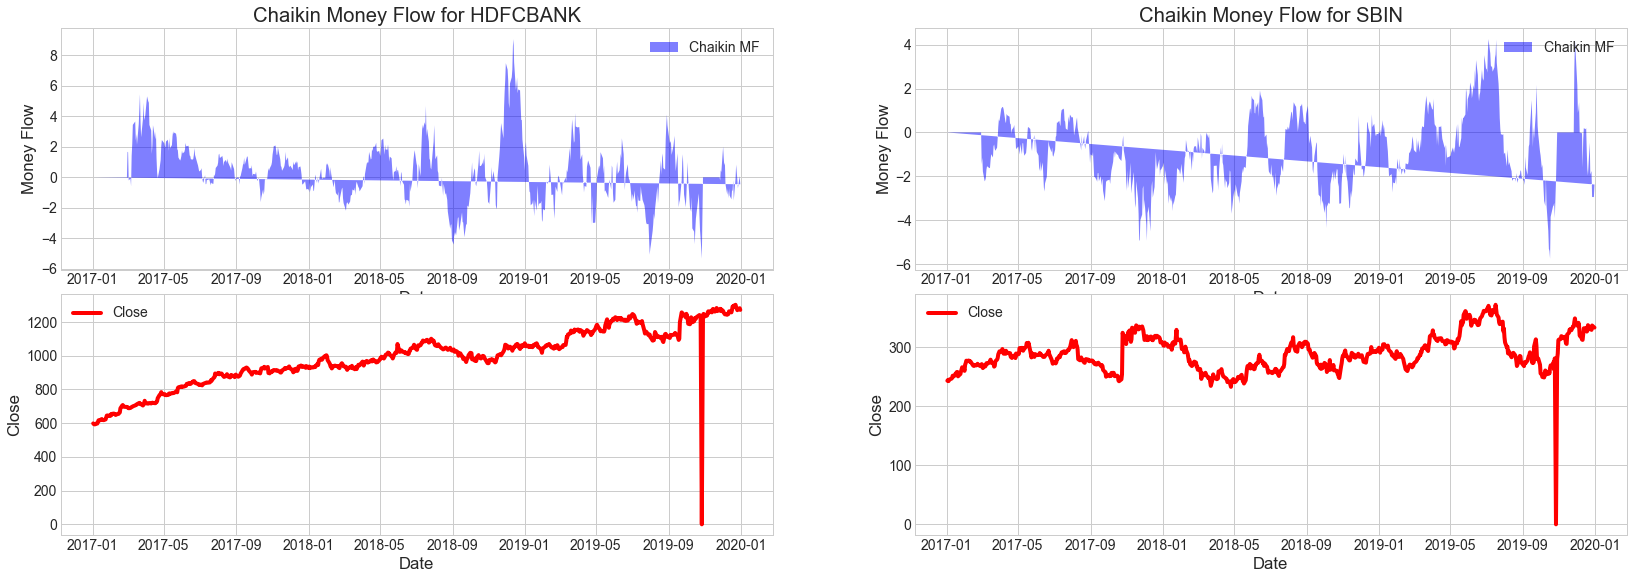

In [33]:
# Chaikin Money Flow Plots
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(25,40))
outer = gridspec.GridSpec(4, 2, wspace=0.2, hspace=0.2)

for i in range(2):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if j==0:
            t = ax.fill(TechIndicator[i].index, TechIndicator[i]['Chaikin_MF'],'b', alpha = 0.5, label = "Chaikin MF")
            ax.set_title("Chaikin Money Flow for " +str(TechIndicator[i]['Label'][0]))
            t = ax.set_ylabel("Money Flow")
        else:
            t = ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'r', label="Close")
            t = ax.set_ylabel("Close")
        ax.legend()
        ax.set_xlabel("Date")
        
        fig.add_subplot(ax)
fig.tight_layout()

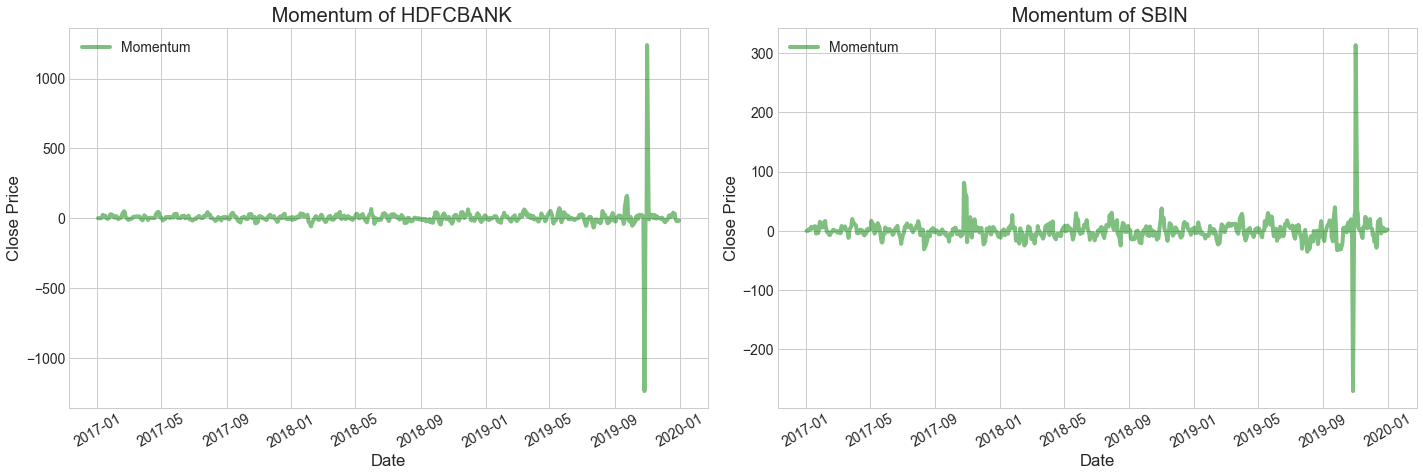

In [34]:
# Momentum Plots
fig = plt.figure(figsize=(20,25))
for i in range(2):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Momentum'], 'green', label="Momentum", alpha = 0.5)
    ax.set_title(" Momentum of " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.xticks(rotation=30)
fig.tight_layout()

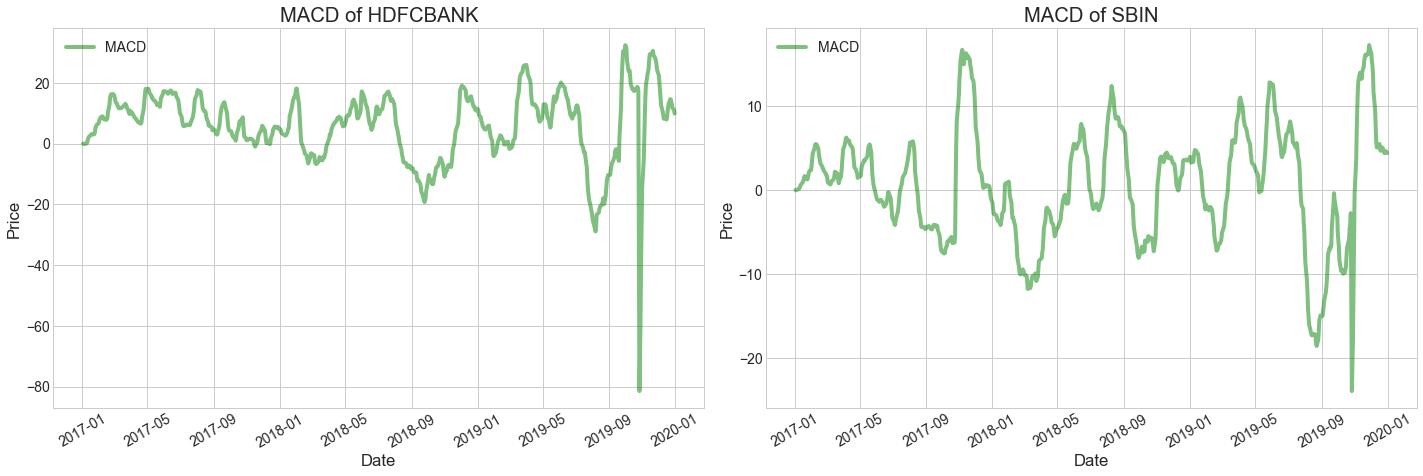

In [35]:
# Moving Average Convergence Divergence
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(2):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['MACD'], 'green', label="MACD", alpha = 0.5)
    ax.set_title("MACD of " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.xticks(rotation=30)
fig.tight_layout()

In [36]:
def uptrend():
    print('\n\t\tUPTREND\t\n')
    print('Retracements\t\tExtensions\n')
    for r,e in zip(retracements,extensions):
        print(r,' = ',round((high - (diff * r/100)),2),'\t', e, ' = ', round((low + (diff * e/100)),2),'\n')

def downtrend():
    print('\n\t\tDOWNTREND\t\n')
    print('Retracements\t\tExtensions\n')
    for r,e in zip(retracements,extensions):
        print(r,' = ',round((low + (diff * r/100)),2),'\t',e, ' = ',round((high - (diff * e/100)),2),'\n')
    


trend = input("What is the trend? up or down: ")
high = float(input('Enter High: '))
low = float(input('enter Low: '))
diff = high - low
print('The difference between High and Low is :',diff)

retracements = [23.6,38.2,50.00,61.8,76.4,78.6,85.40]
extensions = [127.2,138.2,150.00,161.8,176.4,261.8,423.6]

if high > low:
    if trend == 'up':
        uptrend()

    elif trend == 'down':
        downtrend()

    else:
        print("Enter 'up' or 'down'")
else:
    print('High entered must always be greater than Low entered!!!!!')

What is the trend? up or down: up
Enter High: 338.5
enter Low: 333
The difference between High and Low is : 5.5

		UPTREND	

Retracements		Extensions

23.6  =  337.2 	 127.2  =  340.0 

38.2  =  336.4 	 138.2  =  340.6 

50.0  =  335.75 	 150.0  =  341.25 

61.8  =  335.1 	 161.8  =  341.9 

76.4  =  334.3 	 176.4  =  342.7 

78.6  =  334.18 	 261.8  =  347.4 

85.4  =  333.8 	 423.6  =  356.3 

